In [1]:
import pandas as pd
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import TreebankWordTokenizer

nltk.download('punkt', download_dir='/usr/share/nltk_data', force=True)
nltk.download('wordnet', download_dir='/usr/share/nltk_data', force=True)
nltk.download('omw-1.4', download_dir='/usr/share/nltk_data', force=True)


[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data] Downloading package omw-1.4 to /usr/share/nltk_data...


True

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
# Read a Parquet file
!pip install datasets -q
from datasets import load_dataset

df = load_dataset("cardiffnlp/tweet_eval", "sentiment")
df = pd.read_parquet("/content/train.parquet")
df.head()

,text,label
0,"""QT @user In the original draft of the 7th boo...",2
1,"""Ben Smith / Smith (concussion) remains out of...",1
2,Sorry bout the stream last night I crashed out...,1
3,Chase Headley's RBI double in the 8th inning o...,1
4,@user Alciato: Bee will invest 150 million in ...,2


 # Part 1: Data Preprocessing and Baseline Modeling


## Data cleaning and preprocessing

In [8]:
tokenizer = TreebankWordTokenizer()
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)
    text = re.sub(r'@\w+|#\w+', '', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    tokens = tokenizer.tokenize(text)
    print("Tokens:", tokens)
    lemmatized = [lemmatizer.lemmatize(token) for token in tokens]
    print("Lemmatized:", lemmatized)
    return ' '.join(lemmatized)


In [9]:
df['cleaned_text'] = df['text'].astype(str).apply(clean_text)
df[['text', 'cleaned_text', 'label']].head()

Streaming output truncated to the last 5000 lines.
Tokens: ['its', 'september', 'st', 'and', 'more', 'days', 'until', 'nialls', 'birthday', 'and', 'on', 'his', 'birthday', 'its', 'going', 'to', 'be', 'a', 'year', 'since', 'i', 'saw', 'the', 'boys', 'for', 'the', 'wwat']
Lemmatized: ['it', 'september', 'st', 'and', 'more', 'day', 'until', 'nialls', 'birthday', 'and', 'on', 'his', 'birthday', 'it', 'going', 'to', 'be', 'a', 'year', 'since', 'i', 'saw', 'the', 'boy', 'for', 'the', 'wwat']
Tokens: ['lovely', 'overhead', 'coronal', 'seen', 'the', 'night', 'of', 'september', 'at', 'fairbanks', 'alaska', 'by', 'm', 'murray']
Lemmatized: ['lovely', 'overhead', 'coronal', 'seen', 'the', 'night', 'of', 'september', 'at', 'fairbanks', 'alaska', 'by', 'm', 'murray']
Tokens: ['casinos', 'in', 'atlantic', 'city', 'closed', 'since', 'sunday', 'because', 'of', 'sandy', 'what', 'did', 'the', 'pathological', 'gamblers', 'do']
Lemmatized: ['casino', 'in', 'atlantic', 'city', 'closed', 'since', 'sunday', 

,text,cleaned_text,label
0,"""QT @user In the original draft of the 7th boo...",qt in the original draft of the th book remus ...,2
1,"""Ben Smith / Smith (concussion) remains out of...",ben smith smith concussion remains out of the ...,1
2,Sorry bout the stream last night I crashed out...,sorry bout the stream last night i crashed out...,1
3,Chase Headley's RBI double in the 8th inning o...,chase headleys rbi double in the th inning off...,1
4,@user Alciato: Bee will invest 150 million in ...,alciato bee will invest million in january ano...,2


In [10]:
df[['text', 'cleaned_text', 'label']].tail()

,text,cleaned_text,label
45610,"@user \""""So amazing to have the beautiful Lady...",so amazing to have the beautiful lady gaga at ...,2
45611,"9 September has arrived, which means Apple's n...",september ha arrived which mean apple new ipho...,2
45612,Leeds 1-1 Sheff Wed. Giuseppe Bellusci securin...,leeds sheff wed giuseppe bellusci securing a p...,2
45613,@user no I'm in hilton head till the 8th lol g...,no im in hilton head till the th lol go to jas...,1
45614,WASHINGTON (Reuters) - U.S. Vice President Joe...,washington reuters u vice president joe biden ...,1


## exploratory data analysis (EDA)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45615 entries, 0 to 45614
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   text          45615 non-null  object
 1   label         45615 non-null  int64 
 2   cleaned_text  45615 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.0+ MB


In [ ]:
# for index,text in enumerate(df['cleaned_text'][35:40]):
#   print('Review %d:\n'%(index+1),text)

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter, defaultdict
from nltk.corpus import stopwords

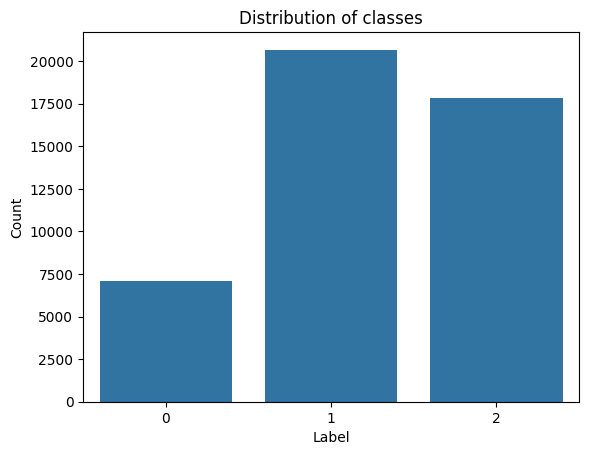

In [18]:
x_axis = df['label'].value_counts()
sns.barplot(x=x_axis.index, y=x_axis.values)
plt.title('Distribution of classes')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

In [29]:
####### problem: stop words should've been dropped?
word_count = defaultdict(Counter)
for _, row in df.iterrows():
    label = row['label']
    text = row['cleaned_text']
    words = text.split()
    word_count[label].update(words)

for label,counter in word_count.items():
  print(f"Label: {label}")
  for word, count in counter.most_common(3):
    print(f"{word}: {count}")
  print(f"\n")

Label: 2
the: 14316
to: 8464
a: 5932


Label: 1
the: 17825
to: 9197
in: 6557


Label: 0
the: 5789
to: 3243
a: 2780




In [33]:
df['word_count'] = df['cleaned_text'].apply(lambda x: len(str(x).split()))
print(f"Avg number of words in label 0:\n {df[df['label']==0]['word_count'].mean()}")
print(f"Avg number of words in label 1:\n {df[df['label']==1]['word_count'].mean()}")
print(f"Avg number of words in label 2:\n {df[df['label']==2]['word_count'].mean()}")


Avg number of words in label 0:
 19.324686310446918
Avg number of words in label 1:
 17.81671745755333
Avg number of words in label 2:
 18.04325172278559


Text(0.5, 1.0, 'Class 2')

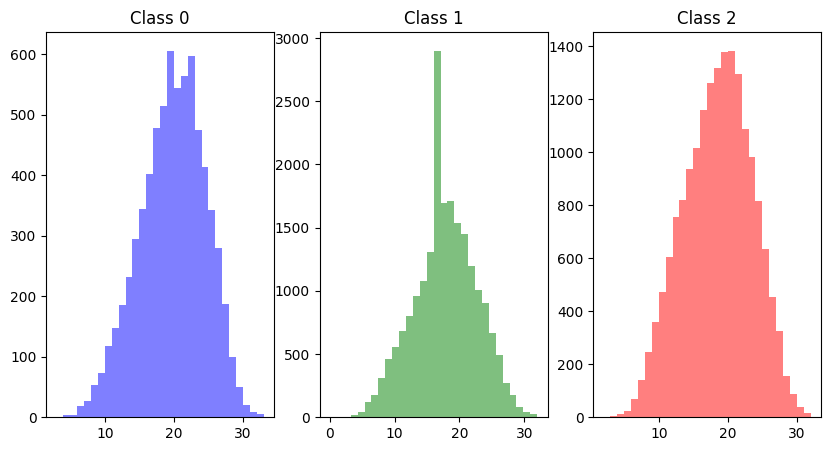

In [41]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(10, 5))
train_words = df[df['label']==0]['word_count']
ax1.hist(train_words, bins=30, alpha=0.5, color='blue', label='Label 0')
ax1.set_title('Class 0')
train_words = df[df['label']==1]['word_count']
ax2.hist(train_words, bins=30, alpha=0.5, color='green', label='Label 1')
ax2.set_title('Class 1')
train_words = df[df['label']==2]['word_count']
ax3.hist(train_words, bins=30, alpha=0.5, color='red', label='Label 2')
ax3.set_title('Class 2')

## Models + Respective Trials:

## LSTM-based model

## RNN-based model

## Feedforward-based model